# Adjacency relations

In [16]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../data/saint_petersburg/blocks.pickle')
blocks_gdf.head(3)

,geometry,site_area,residential,business,recreation,industrial,transport,special,agriculture,land_use,...,capacity_prison,count_prison,capacity_landfill,count_landfill,capacity_plant_nursery,count_plant_nursery,capacity_greenhouse_complex,count_greenhouse_complex,capacity_warehouse,count_warehouse
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",0.032316,0.000,0.0,0.000000,0.0,1.000000,0.0,0.000000,LandUse.TRANSPORT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",137101.088247,0.099,0.0,0.079912,0.0,0.401072,0.0,0.417018,LandUse.AGRICULTURE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",95239.084434,1.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,LandUse.RESIDENTIAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Adjacency graph

Generate adjacency graph indicating relations between adjacent blocks.

In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf, 10)

2025-09-19 19:37:40.874 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:9 - Generating nodes
2025-09-19 19:37:40.880 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:14 - Generating edges
2025-09-19 19:37:43.924 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:37 - Adjacency graph successfully generated: 9533 nodes, 30567 edges


Now `adjacency_graph` is a `networkx.Graph` instance and can be operated using its methods. For example, one can get `block_id=2` neighbors using `g.neighbors(2)`.

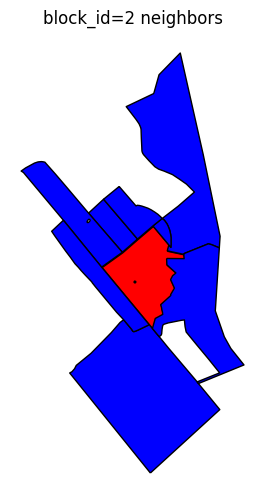

In [4]:
block_id = 2

neighbors = adjacency_graph.neighbors(block_id)
block_gdf = blocks_gdf.loc[[block_id]]
neighbors_gdf = blocks_gdf.loc[neighbors]

ax = block_gdf.plot(color='red', figsize=(6,6), edgecolor='black')
neighbors_gdf.plot(ax=ax, color='blue', edgecolor='black')
ax.set_title(f'block_id={block_id} neighbors')
ax.set_axis_off()

## Adjacency context

Get adjacency graph's subgraph for blocks provided.

In [10]:
from blocksnet.relations import get_adjacency_context

context_graph = get_adjacency_context(adjacency_graph, block_gdf)
len(context_graph.nodes), len(context_graph.edges)

(9, 17)